# Fake News Classification: Decision Trees, Random Forest, and Logistic Regression

DataDource: https://www.kaggle.com/rakeshrau/social-network-ads

Dataset tells which of the users purchased/not purchased a particular product.

## Project Journey

‘Fake News’ is one of the most debated topics in the context of current political discourse across the world. In the 2016 presidential election in US, the impact of misleading ‘News’ like articles received a substantial attention, particularly after the election of President Trump. According to a Pew Research poll*, 64% of adults in US say that fake news has left them confused about basic facts. Given the ubiquity of internet and ease of disseminating unverified information on internet, it is imperative that we need to develop tools and methods to indicate the veracity of a piece of information.

We, the team Sigmoid felt that it is our social responsibility to make use of our knowledge and build a system using machine learning, that could help decide if the news is fake or not. 

#### We started with Fake News data set provided by Kaggle.com. During our initial analysis we realized that the data set had a very limited set of features. We also felt that the dataset can be further enriched by adding domain ranking and spam detection features to identify whether the news is fake or not. Data was only having fake news so we balance it by adding real news from from different data source. 

### Data Preprocessing: 
Data set was not even readable format so performed tons of data preprocession(cleansing, formatting, selection, transformation etc.)
1. Replaced null
2. Special character handling
3. Structuring news content
4. Transformed Real News data from file level to original fake news format.
5. Encoding

### Data Enrichment:
1. Downloaded real news data(https://webhose.io/datasets/) and formatted to align to merge in Kaggle fake news data. Also scrapped from google news.
  - Python code: https://github.com/manojknit/MachineLearningModels/blob/master/DataEnrich/Webhose_RealNews_DataPull.py
  - Output file: https://github.com/manojknit/MachineLearningModels/blob/master/dataset/fake_real_dataset.csv
2. Used Alexa API to get domain ranking data.
  - Python code: https://github.com/manojknit/MachineLearningModels/blob/master/Regression/fetch_domain_rank.py
  - Output file: https://github.com/manojknit/MachineLearningModels/blob/master/dataset/fake_real_dataset.csv
3. Added column by running spam detection madel. 
  - Python code: https://github.com/manojknit/MachineLearningModels/blob/master/DataEnrich/Spam_Score.py
  - Output Data set : https://github.com/manojknit/MachineLearningModels/blob/master/dataset/fake_real_dataset_spam.csv
 
### Latent Manifold:
 After data enrichment we found latent variables like domain rank, spam score. We fount Domain Rank as Latent Manifold.
 
Following diagram depicts the data enrichment process for fake news.

![Fake news data enrichment ](https://s3-us-west-2.amazonaws.com/themodestwhite.com/ml_fn.jpg)

Once the dataset was sufficiently enriched, we tried executing a couple of machine learning algorithms on our dataset. We encountered following issues:
1. Any sophisticated approach to identify fake news uses **"NLP"** techniques. We as a team didn't have much knowledge on NLP at the time so we put this on hold.
2. Also, the data didn't have many numerical columns that could be used for many classification algorithms. We were not familiar with **"Vectorization"** techniques which could use a piece of text transformed into a **"bag-of-words"**.

We learn't that we need more time and expertise to handle this problem statement. Hence we decided to put Fake News on hold and work on another related problem, that can better justify covered models in class **"The impact of social network ads."**. We tried sever models like linear regression and clustering but we did not see expected results however classification worked quite well and we were able to predict fake or not for dataset.

### Conclusion:
We run several models and achieve 100% accurecy with Decision Tree and Random Forest. However logistic Regression did not do well. Infact it is amaizing. 

In the following sections we will  discuss the project in detail.

In [31]:
# ignoring warnings to remove clutter 
import warnings
warnings.filterwarnings('ignore')

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier 
%matplotlib inline

In [2]:
#df = pd.read_csv('../dataset/FakeAndReal09_17_25.tsv', sep='\t')
df = pd.read_csv('../dataset/fake_real_dataset_spam.csv')
#X = dataset.iloc[:, :-1].values
#y = dataset.iloc[:, 4].values

print(df.shape)
df.describe()

(3711, 23)


,Unnamed: 0,ord_in_thread,domain_rank,spam_score,replies_count,participants_count,likes,comments,shares,spam-score
count,3711.000000,3711.000000,3.711000e+03,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000,3711.000000
mean,1855.000000,1.669631,3.265969e+05,0.044921,2.291296,2.106710,24.406090,0.252493,24.398814,0.909796
std,1071.417752,10.162467,1.209855e+06,0.160145,15.017726,9.617506,113.799844,5.814621,113.797344,0.098041
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.348907
25%,927.500000,0.000000,2.890000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.868086
50%,1855.000000,0.000000,1.576100e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.942406
75%,2782.500000,0.000000,8.194000e+04,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.990001
max,3710.000000,100.000000,7.310981e+06,1.000000,500.000000,296.000000,999.000000,319.000000,999.000000,0.999997


In [3]:
df.head()

,Unnamed: 0,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,...,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type,content,spam-score
0,0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov‚Äôt...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,Print They should pay all the back all the mon...,0.994571
1,1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,Why Did Attorney General Loretta Lynch Plead T...,0.846749
2,2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \r\nFox News Sunday reported this ...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias,Red State : \r\nFox News Sunday reported this ...,0.998046
3,3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,Email Kayla Mueller was a prisoner and torture...,0.980603
4,4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,0.986030


In [4]:
dft = df.loc[:, ['domain_rank', 'shares', 'type']]
print(dft.shape)
print('----------')
#X = dft.iloc[:, :-1].values
#y = dft.iloc[:, 1].values


(3711, 3)
----------


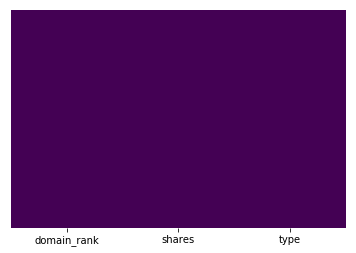

In [5]:
# to check missing values
sns.heatmap(dft.isnull(),yticklabels=False,cbar=False,cmap='viridis')

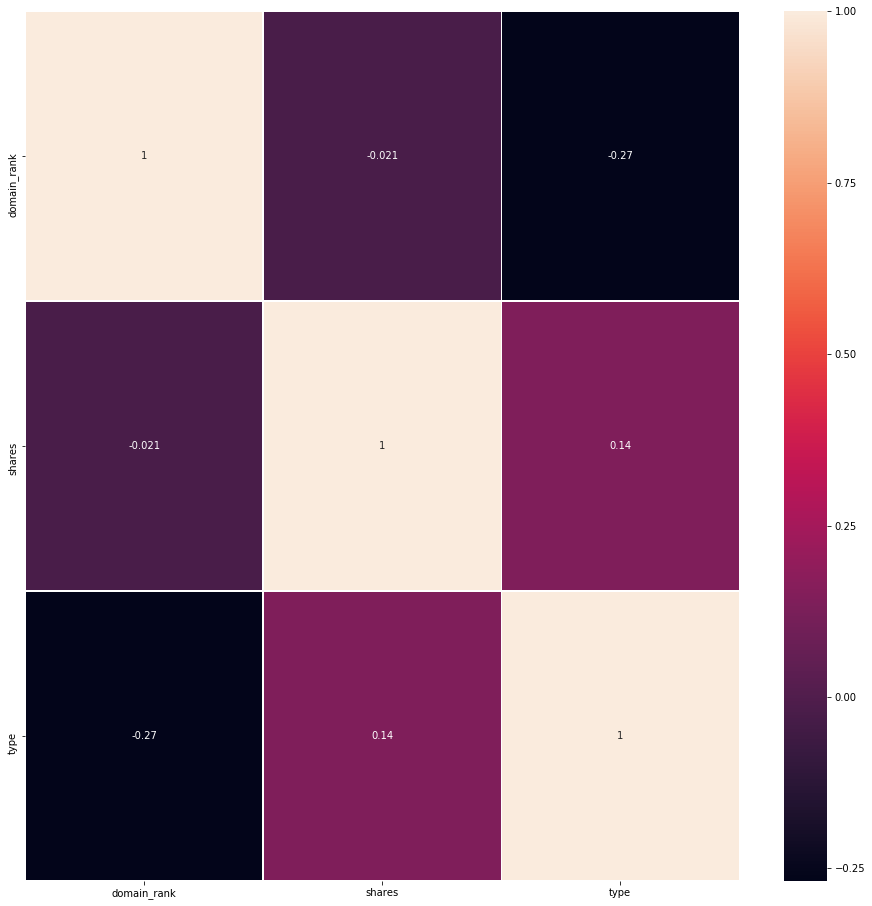

In [35]:
#shows corelation between columns in matrix form
tc = dft.corr()   
# Plotting corelation
plt.figure(figsize=(16, 16))
sns.heatmap(tc, annot=True, linewidths=.5)

In [6]:
# LabelEncoder - Encoding categorical data to number, OneHotEncoder - row to column 
# only used for Type column
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
dft['type'] = labelencoder.fit_transform(dft[['type']])
#df = df.apply(labelencoder.fit_transform) # multicolumn encoding
#onehotencoder = OneHotEncoder(categorical_features = [0])
#y = onehotencoder.fit_transform(y).toarray()
dft.head()

/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,domain_rank,shares,type
0,88465,0,0
1,88465,0,0
2,88465,0,0
3,88465,0,0
4,88465,0,0


/Users/mk194903/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/Users/mk194903/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/mk194903/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, *

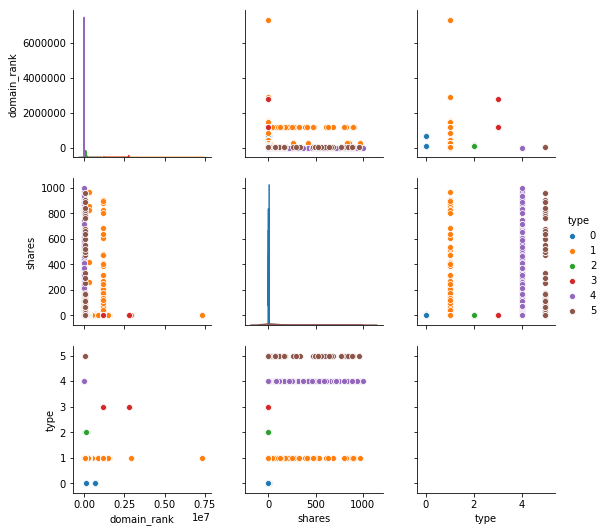

In [7]:
# to see pattern
sns.pairplot(data=dft, hue="type")

In [8]:
X = dft[['domain_rank', 'shares']]
y = dft['type']
print(X)


      domain_rank  shares
0           88465       0
1           88465       0
2           88465       0
3           88465       0
4           88465       0
5           88465       0
6           88465       0
7           88465       0
8           88465       0
9           88465       0
10          88465       0
11          88465       0
12          88465       0
13          88465       0
14          88465       0
15          88465       0
16          88465       0
17          88465       0
18          88465       0
19          88465       0
20          88465       0
21          88465       0
22          88465       0
23          88465       0
24          88465       0
25          88465       0
26          88465       0
27          88465       0
28          88465       0
29          88465       0
...           ...     ...
3681          238       9
3682           72       0
3683          139       0
3684          478       0
3685          164       0
3686            5       0
3687        

In [9]:
y.unique()

array([0, 2, 3, 1, 5, 4])

In [10]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state = 100)

# Decision Tree

In [11]:
classifier = DecisionTreeClassifier(criterion ='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [12]:
y_pred = classifier.predict(X_test)

### Validation

In [13]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred) 

array([[ 14,   0,   0,   0,   0,   0],
       [  0, 399,   0,   0,   0,   0],
       [  0,   0,  66,   0,   0,   0],
       [  0,   0,   0,   5,   0,   0],
       [  0,   0,   0,   0, 418,   0],
       [  0,   0,   0,   0,   0,  26]])

In [14]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       399
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00       418
           5       1.00      1.00      1.00        26

   micro avg       1.00      1.00      1.00       928
   macro avg       1.00      1.00      1.00       928
weighted avg       1.00      1.00      1.00       928



In [15]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,y_pred)*100)

Accuracy :  100.0


### Tree Visualization

In [16]:
#install
#conda install -c https://conda.binstar.org/sstromberg pydot
#conda install GraphViz
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(X)
features

['domain_rank', 'shares']

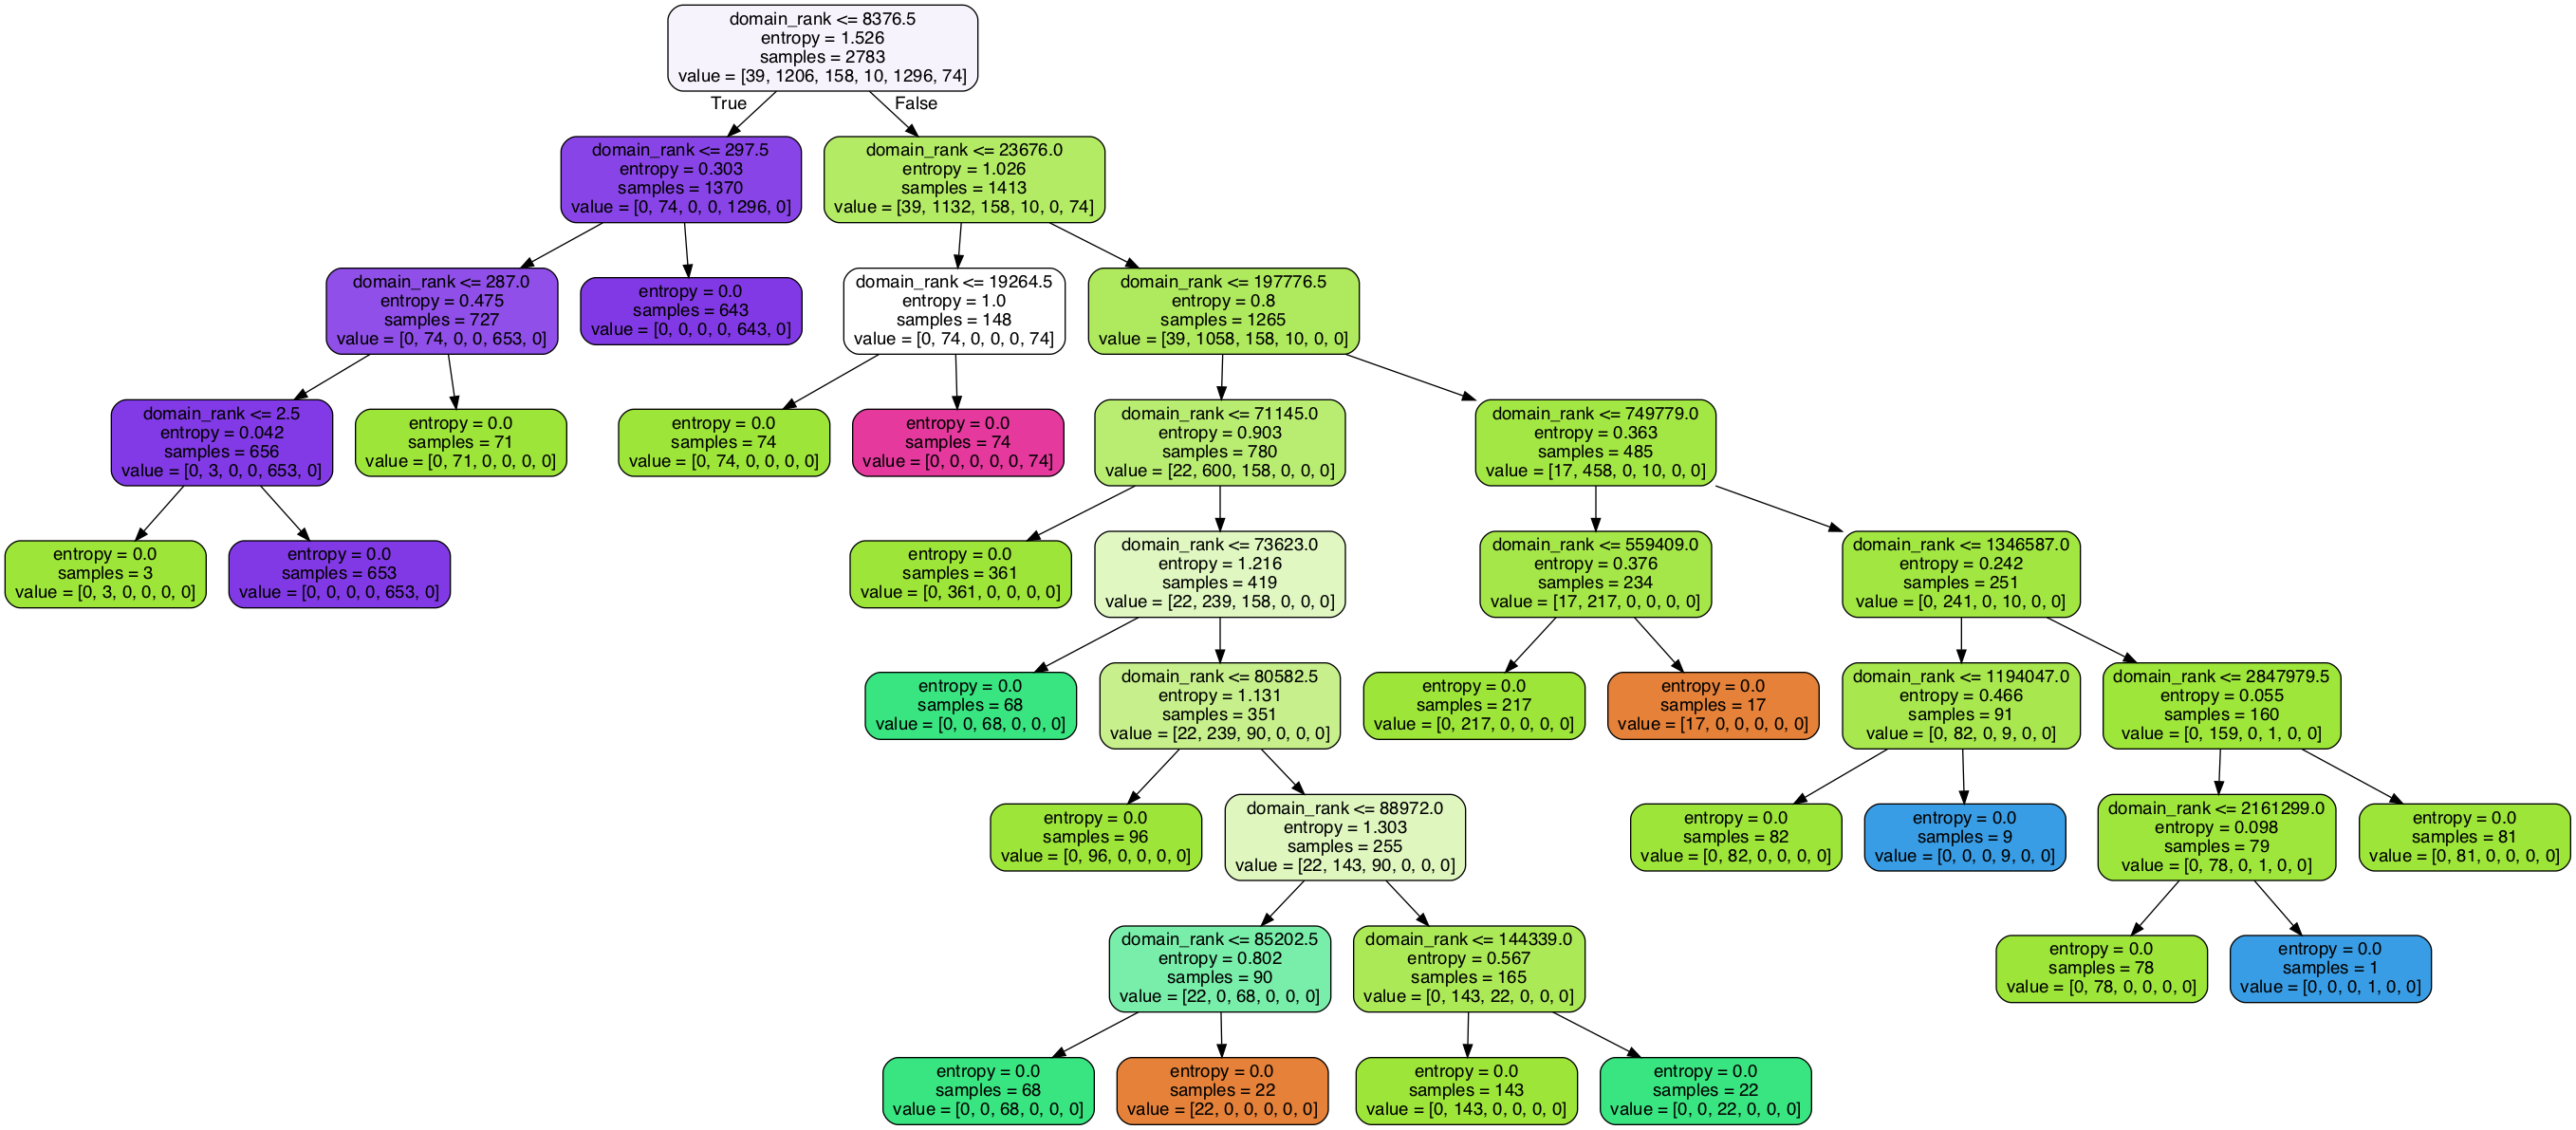

In [17]:
dot_data = StringIO()  
export_graphviz(classifier, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

# Random Forests

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))

[[ 14   0   0   0   0   0]
 [  0 399   0   0   0   0]
 [  0   0  66   0   0   0]
 [  0   0   0   5   0   0]
 [  0   0   0   0 418   0]
 [  0   1   0   0   0  25]]


In [21]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00       399
           2       1.00      1.00      1.00        66
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00       418
           5       1.00      0.96      0.98        26

   micro avg       1.00      1.00      1.00       928
   macro avg       1.00      0.99      1.00       928
weighted avg       1.00      1.00      1.00       928



In [28]:
#from sklearn.metrics import accuracy_score 
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test,rfc_pred)*100)

Accuracy :  99.89224137931035


# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [24]:
predictions = logmodel.predict(X_test)

### Evaluation

In [25]:
print(confusion_matrix(y_test,rfc_pred))

[[ 14   0   0   0   0   0]
 [  0 399   0   0   0   0]
 [  0   0  66   0   0   0]
 [  0   0   0   5   0   0]
 [  0   0   0   0 418   0]
 [  0   1   0   0   0  25]]


In [26]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.46      1.00      0.63       399
           2       0.00      0.00      0.00        66
           3       0.00      0.00      0.00         5
           4       0.98      0.15      0.25       418
           5       0.00      0.00      0.00        26

   micro avg       0.49      0.49      0.49       928
   macro avg       0.24      0.19      0.15       928
weighted avg       0.64      0.49      0.39       928



/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/mk194903/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


**precision**
Measures the fraction(ratio) of actual positives among those examples that are predicted as positive. 
The best value is 1 and the worst value is 0.
Precision = tp / (tp + fp)

**recall**
Measures the fraction of actual positives that are predicted as positive. The recall is intuitively the ability of the classifier to find all the positive samples.
The best value is 1 and the worst value is 0.
Recall = tp / (tp + fn)

**f1-score also known as balanced F-score or F-measure**
The F1 score can be interpreted as a weighted average of the precision and recall, where an F1 score reaches its best value at 1 and worst score at 0. The relative contribution of precision and recall to the F1 score are equal. The formula for the F1 score is:
F1 = 2 x (precision x recall) / (precision + recall)

----
**Accuracy (ACC)** 
Measures the fraction(ratio) of correct predictions. 
The best value is 1 and the worst value is 0.
Accuracy = TP+TN / (TP+TN+FP+FN)

Model Predicts user purchased or not.

Thank You!